In [1]:
import pandas as pd
import numpy as np
import pulp

import sys
sys.path.insert(0, '../..')
import bottleneck_assignment
import assignment

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

import time

In [2]:
helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
    np.array([
        [8, 2, 3, 3],
        [2, 7, 5, 8],
        [0, 9, 8, 4],
        [2, 5, 6, 3]
    ]),
    [1, 1, 1, 1]
)

helper.solve(verbose=True)

Searching between 3 and 9
Searching between 3 and 7
Searching between 3 and 6


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


array([4, 5])

In [3]:
helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
    np.array([
        [np.pi, np.sqrt(3), 54392],
        [0, np.e ** 3, np.e ** 3],
        [-2, np.sin(np.pi / 8), 4]
    ]),
    [1, 1, 1]
)

helper.solve(verbose=True)

4.0

In [6]:
prob_df = pd.read_csv('../../data/subset_data.csv', index_col=0)
subset_prob_df = prob_df[prob_df['Used']]
capacity_df = prob_df['Real'].value_counts()
types = ['ES', 'PSH', 'TH', 'RRH', 'PREV']

increase_from_best_df = subset_prob_df.copy()
increase_from_best_df['Best'] = increase_from_best_df[types].min(axis=1)
for type_ in types:
    increase_from_best_df[type_] = subset_prob_df[type_] - increase_from_best_df['Best']
increase_from_best_df = increase_from_best_df[types]

increase_from_best_df.head()

,ES,PSH,TH,RRH,PREV
2,0.138807,0.000000,0.077800,0.148701,0.029491
3,0.080806,0.654604,0.031637,0.072591,0.000000
4,0.086533,0.069397,0.035603,0.091095,0.000000
7,0.094090,0.000000,0.142770,0.158622,0.065307
8,0.111943,0.031211,0.065289,0.063653,0.000000


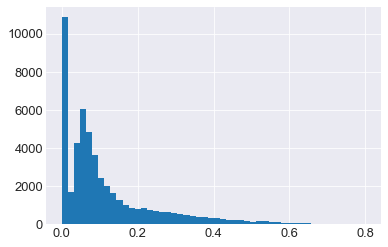

In [7]:
plt.hist(increase_from_best_df.to_numpy().flatten(), bins=50)
plt.show()

In [6]:
helper = bottleneck_assignment.BottleneckAssignmentHelperV2(
    increase_from_best_df.to_numpy(),
    capacity_df.sort_index().to_numpy()
)

t0 = time.time()
print(helper.solve(verbose=True))
print(f'Took {time.time() - t0:.4f} seconds')

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.021094955 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.093918491 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.19467070600000003 and 0.801554275


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.307160741 and 0.801554275
Searching between 0.307160741 and 0.401839292


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.348290327 and 0.401839292


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.37268020100000004 and 0.401839292


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.38588789500000004 and 0.401839292
Searching between 0.38588789500000004 and 0.39406465600000007


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.390127914 and 0.39406465600000007


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.3920954670000001 and 0.39406465600000007
Searching between 0.3920954670000001 and 0.392969303


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.39272293700000005 and 0.392969303
Searching between 0.39272293700000005 and 0.39286463200000005


/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


Searching between 0.392810789 and 0.39286463200000005
[0.39281079 0.39285834]
Took 34.8566 seconds


In [8]:
constraints = [0.39281079, 0.39285834, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]

summed_probs = []
compare_dfs = []

for constraint in constraints:
    helper = assignment.AssignmentHelper(prob_df=subset_prob_df)
    helper.update_constraints(
        fairness_best_constraint=constraint,
        capacity_df=capacity_df
    )
    
    sol_df = helper.ip_solve()
    if sol_df is False:
        summed_probs.append(False)
        compare_dfs.append(False)
    else:
        summed_probs.append(pulp.value(helper.prob.objective))
        compare_dfs.append(helper.compare_prob(sol_df))
    
    print(constraint, pulp.LpStatus[helper.prob.status])

/Users/quannguyen/anaconda3/envs/BayesFAI/lib/python3.7/site-packages/pulp/solvers.py:2080: UserWarning: GUROBI_CMD does provide good solution status of non optimal solutions
  warnings.warn('GUROBI_CMD does provide good solution status of non optimal solutions')


0.39281079 Not Solved
0.39285834 Optimal
0.4 Optimal
0.45 Optimal
0.5 Optimal
0.55 Optimal
0.6 Optimal
0.65 Optimal
0.7 Optimal


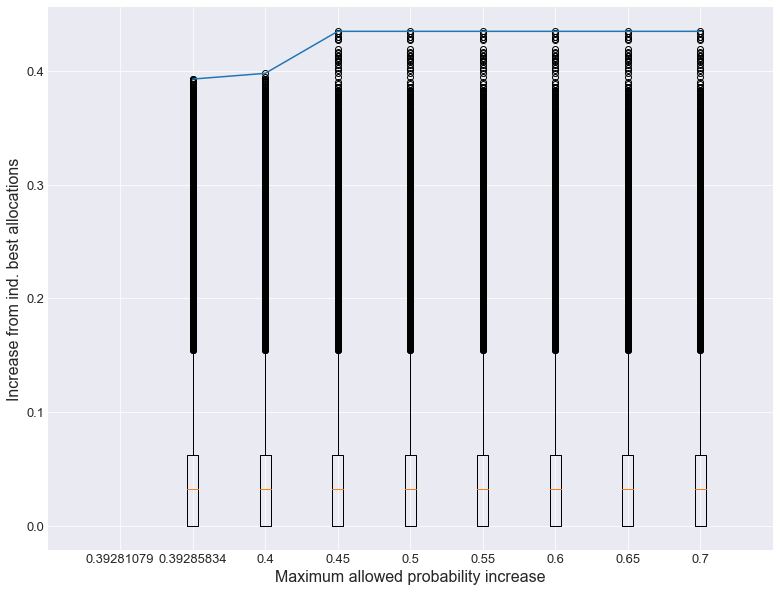

In [9]:
f, ax1 = plt.subplots(figsize=(13, 10))

for c_idx, c in enumerate(constraints):
    df = compare_dfs[c_idx]
    
    if df is not False:
        ax1.boxplot(
            df['Input_to_best'],
            positions=[c_idx],
            # widths=[0.1]
        )

ax1.plot(
    [i for i in range(len(constraints))],
    [df['Input_to_best'].max()
     if df is not False else np.nan
     for df in compare_dfs]
)
    
ax1.set_xlabel('Maximum allowed probability increase', fontsize=16)
ax1.set_ylabel('Increase from ind. best allocations', fontsize=16)
ax1.set_xlim(-1, len(constraints))

ax1.set_xticks([i for i in range(len(constraints))])
ax1.set_xticklabels(constraints)

# ax2 = ax1.twinx()
# ax2.plot([i for i in range(1, len(constraints))])

plt.show()

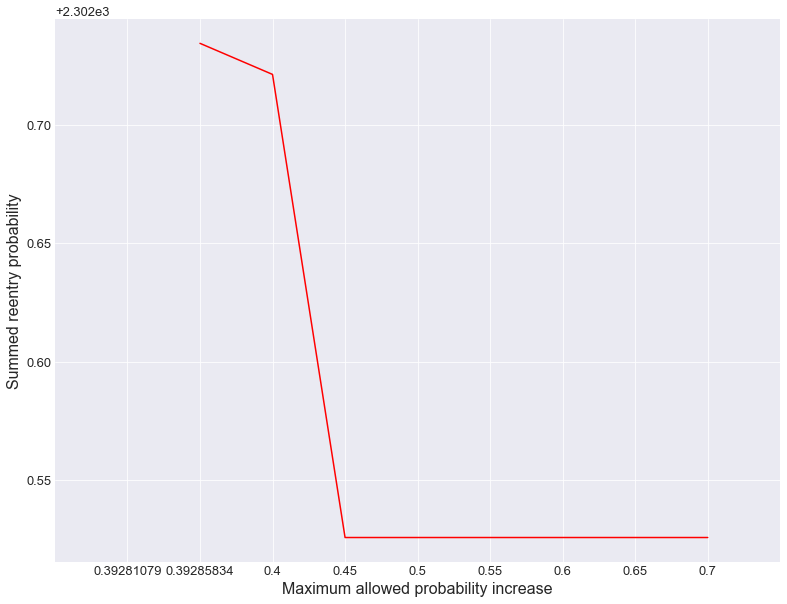

In [10]:
f, ax = plt.subplots(figsize=(13, 10))

ax.plot(
    [i for i in range(1, len(constraints))], summed_probs[1:],
    c='red'
)

ax.set_xlabel('Maximum allowed probability increase', fontsize=16)
ax.set_ylabel('Summed reentry probability', fontsize=16)
ax.set_xlim(-1, len(constraints))

ax.set_xticks([i for i in range(len(constraints))])
ax.set_xticklabels(constraints)

plt.show()

In [11]:
summed_probs

[False,
 2302.734326293996,
 2302.721215620996,
 2302.525906114997,
 2302.525906114997,
 2302.525906114997,
 2302.525906114997,
 2302.525906114997,
 2302.525906114997]

In [12]:
reductions = []

for prob in summed_probs:
    if prob is False:
        reductions.append(False)
    else:
        reductions.append((2796 - prob) / 2796)

reductions

[False,
 0.17641833823533754,
 0.17642302731724027,
 0.17649288050250472,
 0.17649288050250472,
 0.17649288050250472,
 0.17649288050250472,
 0.17649288050250472,
 0.17649288050250472]

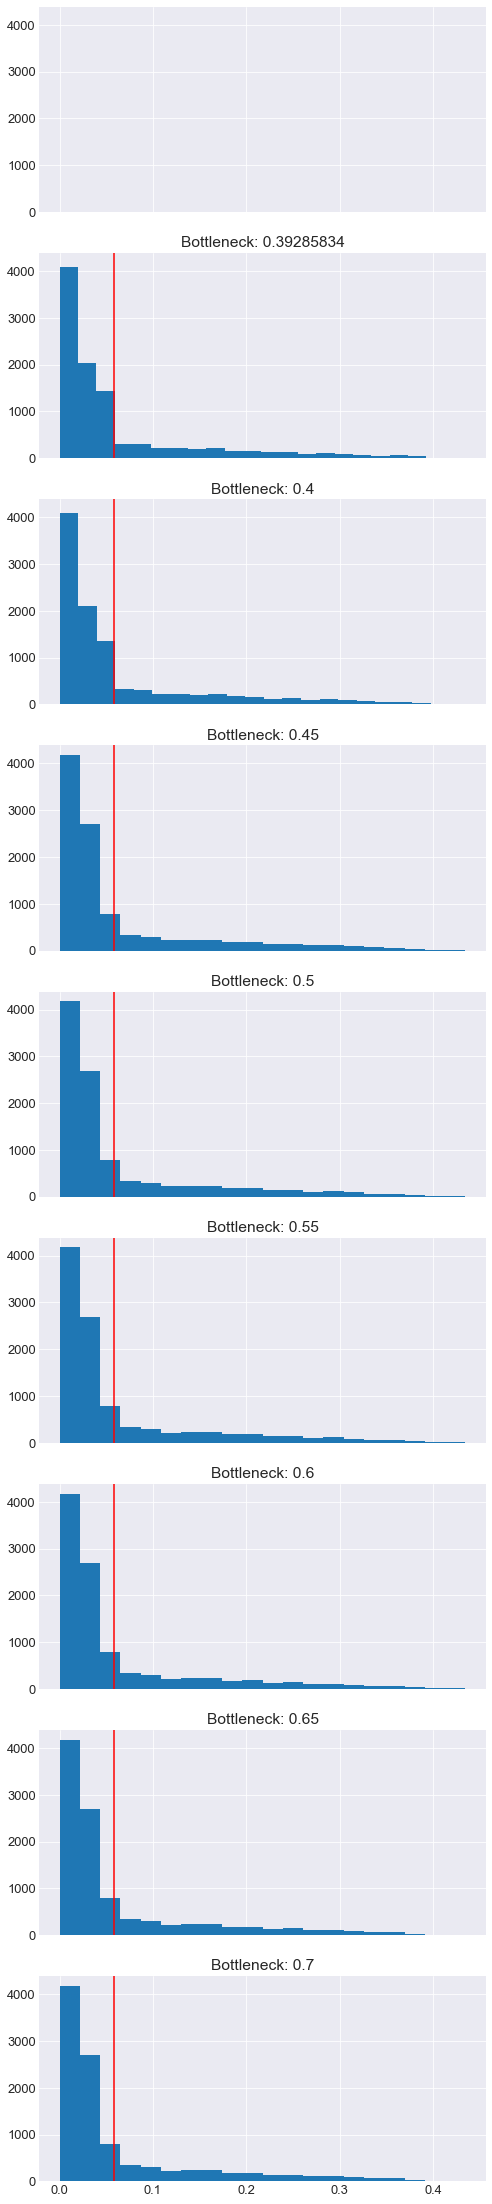

In [15]:
f, ax = plt.subplots(len(constraints), 1,
                     figsize=(8, 40), sharex=True, sharey=True)

for c_idx, c in enumerate(constraints):
    df = compare_dfs[c_idx]
    
    if df is not False:
        ax[c_idx].hist(df['Input_to_best'], bins=20)
        ax[c_idx].axvline(df['Input_to_best'].mean(), c='r')
        ax[c_idx].set_title(f'Bottleneck: {c}')

plt.show()